In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing useful libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
pd.options.display.max_columns = 150

In [4]:
# Useful Functions
def plot_bar_graph(cat_var):
    sns.barplot(x=cat_var, y='cnt', data=df)
    plt.xticks(rotation=45,ha="right")
    plt.show()

def plot_box(cat_var):
    sns.boxplot(x = cat_var, y = 'cnt', data = df)
    #plt.xticks(rotation=45,ha="right")
    #plt.show()    

In [5]:
# read the data
df = pd.read_csv("day.csv")

### Understanding The Data

#### Getting the glimpse of the data

In [6]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


##### Checking some aspects of the dataframe

In [7]:
df.shape

(730, 16)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [9]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Cleaning The Dataset

#### Comment on instant column
This column just provides the index of respective row and hence does not add any value to our analysis. So I will be dropping it

#### Comment on dteday column

"dteday" column is date column. Generally I would use this column to derive information like, month, day, year, weekday, weekend, etc information. But all the information is readily avaialble in the original dataset in various columns. So this makes the column "dteday" redundant for our analysis. Hence I would drop this column.


#### Comment on temp and atemp
Both these columns basically provide temperature information on a given day. "temp" indicates temperature forecasted by the department whereas "atemp" indicates the actual feeling temperature on the same day. Since both of there will always be related to each other and provide similar information we can get rid of one out of these two. According to me, "atemp" is more related to our analysis as this is the temperature felt by cyclists. Hence I am keeping "atemp" and dropping "temp"

#### Comment on casual and registered
First of all, these two columns sum up to give us final count which is indicated by column "cnt" which is also our target variable. We are not doing any categorization in our analysis and we are more interested in getting a model that provides variables which affect our target variable. Hence considering these columns will not give us any insights. Hence I will be dropping both these columns from my analysis.

In [10]:
df = df.drop(['instant', 'dteday', 'temp', 'casual', 'registered'], axis=1)

In [11]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,11.46350,43.6957,12.522300,1600


### Visualising The Data

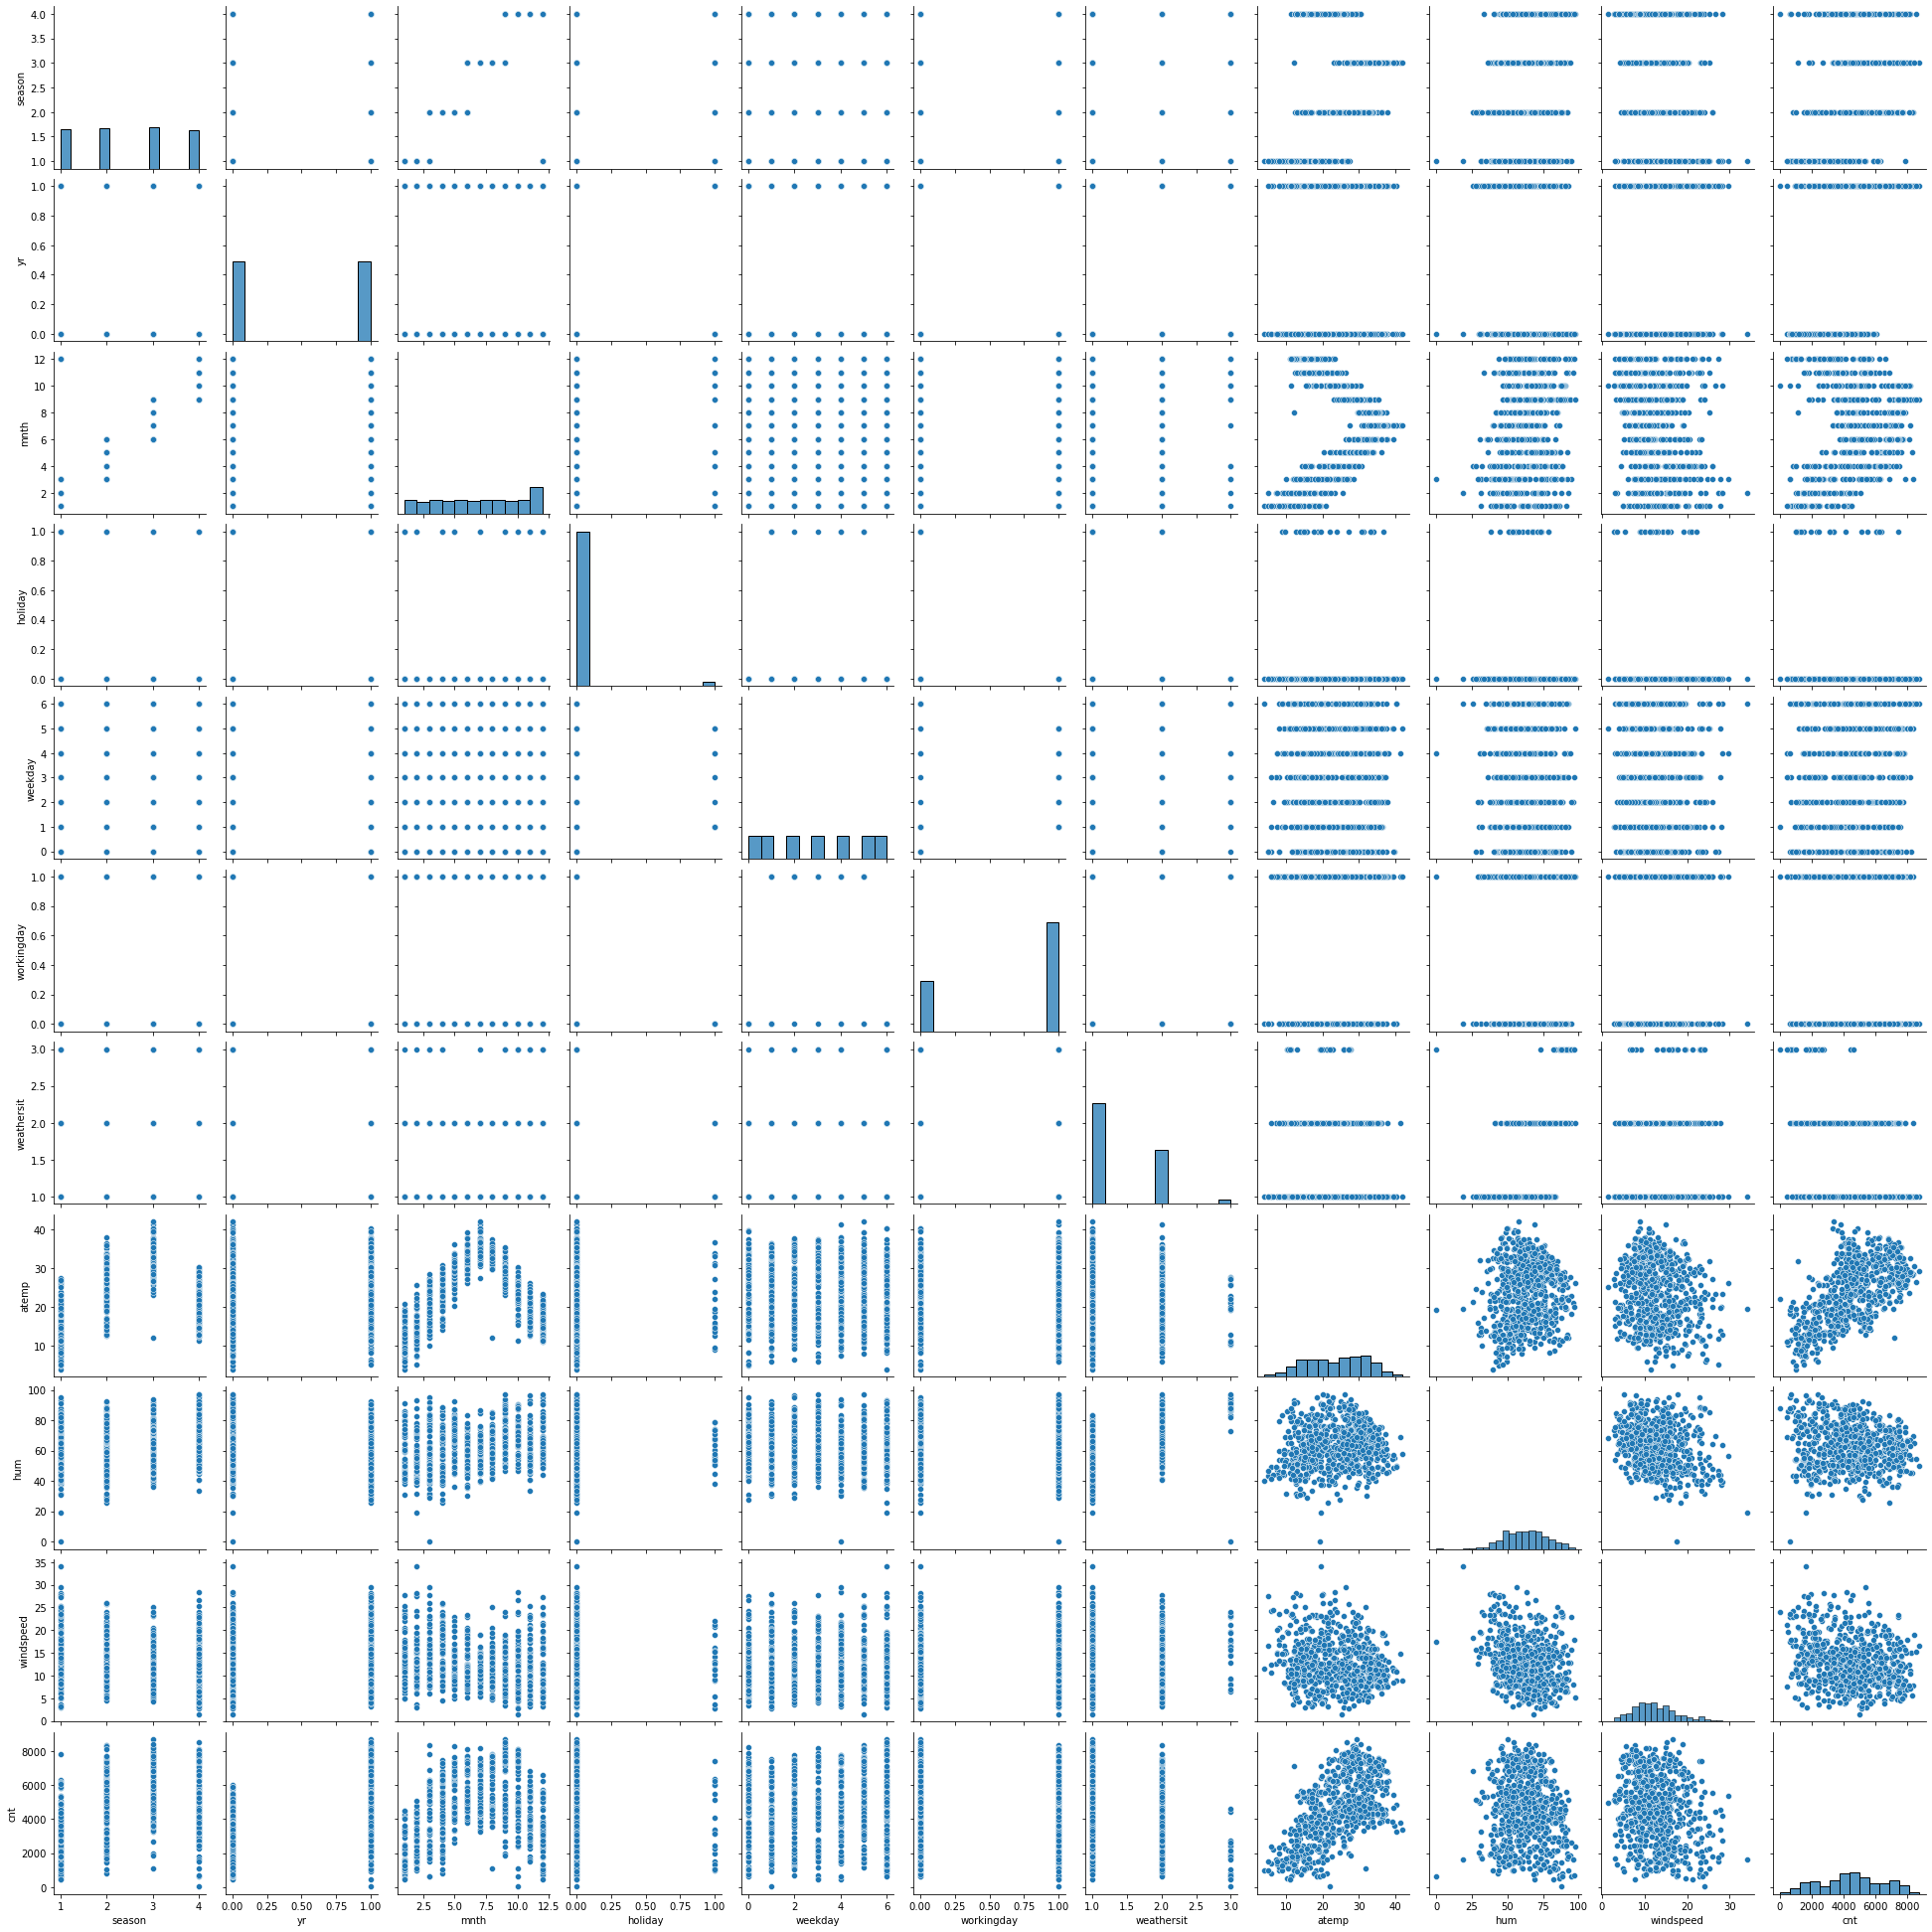

In [12]:
sns.pairplot(df)

## Variables classification

We observed that, we have some categorical variables and some continuous variables

Categorical Variables: season, yr, mnth, holiday, weekday, workingday, weathersit

Continuous Variables: atemp, hum, windspeed

### Visualising Categorical Variables

#### From the below box plots, it is clrealy visible that, for categories "season", "yr", "mnth", "holiday", "weathersit", there is significant variation in demand for different values of individual category. Hence it is worth considering these for model analysis and look for their individual co-efficients to see the impact of them on the end-model

##### For remaining two categorical variables "weekday" and "workingday", I do not see considerable variation in demand across all the categorical values. So for me it looks like, they may not identify themselves as affecting factors to our model. But I will not drop them at this moment but let our model building exercise decide the same

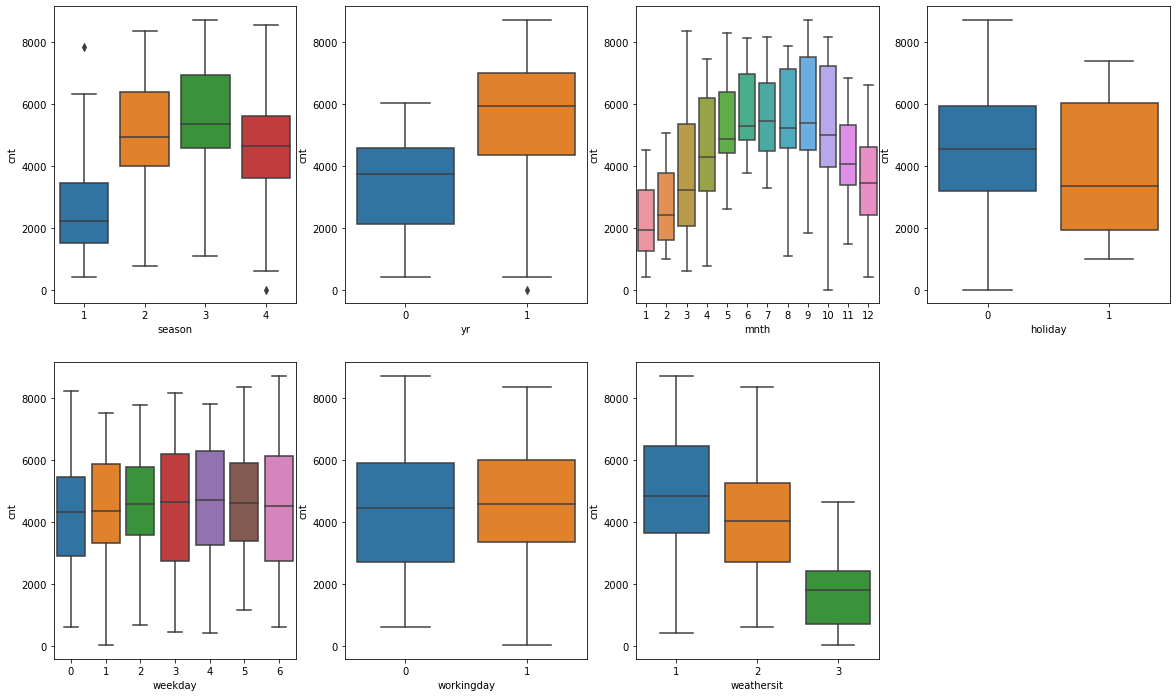

In [13]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
plot_box(df.season)
plt.subplot(2,4,2)
plot_box(df.yr)
plt.subplot(2,4,3)
plot_box(df.mnth)
plt.subplot(2,4,4)
plot_box(df.holiday)
plt.subplot(2,4,5)
plot_box(df.weekday)
plt.subplot(2,4,6)
plot_box(df.workingday)
plt.subplot(2,4,7)
plot_box(df.weathersit)


#### Below box plots are created just to check impact of holiday and workindday on weekday column. Not making any conclusion from the same at this moment but may use these later point in time to understand the model better

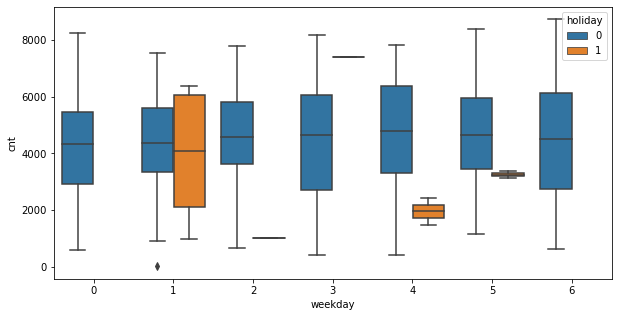

In [14]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'weekday', y = 'cnt', hue = 'holiday', data = df)
plt.show()

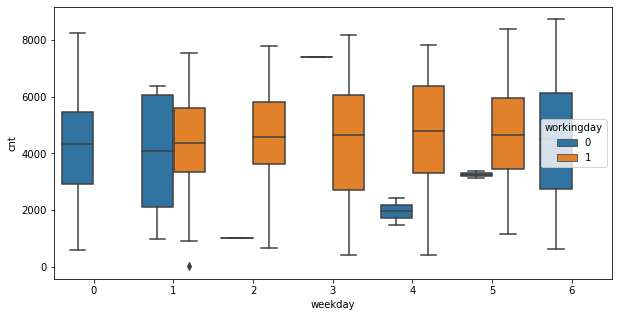

In [15]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'weekday', y = 'cnt', hue = 'workingday', data = df)
plt.show()

### Visualising Continuous Variables

#### From the below bar graps and box plots, it is clrealy visible that, continuous variables "hum" and "windspeed" show some relationship with demand. Hence it is worth considering these for model analysis and look for their individual co-efficients to see the impact of them on the end-model

#### Humidity and Demand relation

Created 10 bins of humidity level and tried to visualize the demand distribution for all humidity levels.

It can be observed here that, low humidity attracts very less demand, also humidity higher than 70 reduces the demand

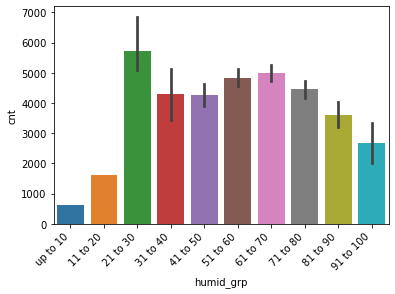

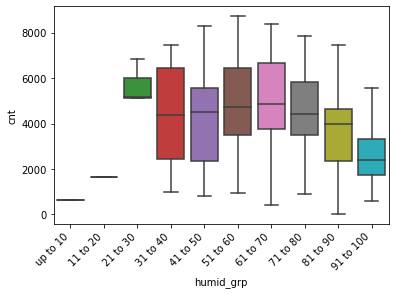

In [16]:
humid_levels = ['up to 10', '11 to 20', '21 to 30', '31 to 40', '41 to 50', '51 to 60', '61 to 70', '71 to 80', '81 to 90', '91 to 100']
cut_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
#df["income_group"] = pd.cut(loan_analyse['annual_inc'], bins=cut_bins, labels=income_levels, include_lowest=True)
df['humid_grp'] = pd.cut(df.hum, bins=cut_bins, labels=humid_levels, include_lowest=True)
plot_bar_graph(df.humid_grp)
plot_box(df.humid_grp)
plt.xticks(rotation=45,ha="right")
plt.show()

#### Windspeed and Demand relation

Created 7 bins of windspeed and tried to visualize the demand distribution across windspeed values.

It can be observed here that, lower the wind speed, higher is the demand and when speed is more than 30, demand reduces drastically

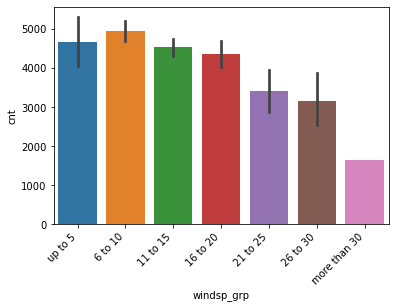

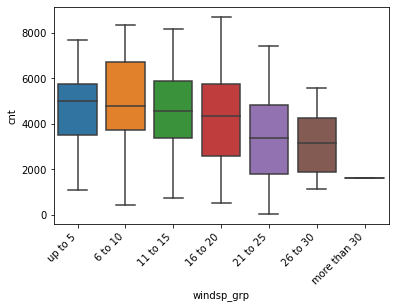

In [17]:
windsp_levels = ['up to 5', '6 to 10', '11 to 15', '16 to 20', '21 to 25', '26 to 30', 'more than 30']
cut_bins = [0, 5, 10, 15, 20, 25, 30, 35]
#df["income_group"] = pd.cut(loan_analyse['annual_inc'], bins=cut_bins, labels=income_levels, include_lowest=True)
df['windsp_grp'] = pd.cut(df.windspeed, bins=cut_bins, labels=windsp_levels, include_lowest=True)
plot_bar_graph(df.windsp_grp)
plot_box(df.windsp_grp)
plt.xticks(rotation=45,ha="right")
plt.show()

#### Finding correlation between target variable and various continuous variables

From below table it is observed that 'cnt' is positively correlated significantly with 'atemp'; however windspeed is correlated with cnt in a negative manner with low correlation value. Also 'cnt' and 'hum' are negatively correlated with very less negative value

Let us make conclusion about this relation during model building phase

In [18]:
df[['cnt', 'atemp', 'hum', 'windspeed']].corr()

,cnt,atemp,hum,windspeed
cnt,1.000000,0.630685,-0.098543,-0.235132
atemp,0.630685,1.000000,0.141512,-0.183876
hum,-0.098543,0.141512,1.000000,-0.248506
windspeed,-0.235132,-0.183876,-0.248506,1.000000


In [19]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,humid_grp,windsp_grp
0,1,0,1,0,6,0,2,18.18125,80.5833,10.749882,985,81 to 90,11 to 15
1,1,0,1,0,0,0,2,17.68695,69.6087,16.652113,801,61 to 70,16 to 20
2,1,0,1,0,1,1,1,9.47025,43.7273,16.636703,1349,41 to 50,16 to 20
3,1,0,1,0,2,1,1,10.60610,59.0435,10.739832,1562,51 to 60,11 to 15
4,1,0,1,0,3,1,1,11.46350,43.6957,12.522300,1600,41 to 50,11 to 15


#### For Model building, we do not need columns humid_grp and windsp_grp. We can get rid of these as we got required interpretation and understanding from these columns

In [20]:
df = df.drop(['humid_grp', 'windsp_grp'], axis=1)

In [21]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,11.46350,43.6957,12.522300,1600


## Data Preparation

### Labeling Data

All the categorical variables in the data set have numerical values. We need to assign appropriate string labels to these numerical values which will help us during encoding.

#### 1. season (1:spring, 2:summer, 3:fall, 4:winter)

In [22]:
def season_to_string(season_value):
    if season_value == 1:
        return 'spring'
    elif season_value == 2:
        return 'summer'
    elif season_value == 3:
        return 'fall'
    elif season_value == 4:
        return 'winter'

In [23]:
df.season = df.season.apply(lambda x: season_to_string(x))

#### 2. weathersit (1:clear, 2:mist, 3:light_rain, 4: heavy_rain)

In [24]:
def weathersit_to_string(weathersit_value):
    if weathersit_value == 1:
        return 'weathersit_1'
    elif weathersit_value == 2:
        return 'weathersit_2'
    elif weathersit_value == 3:
        return 'weathersit_3'
    elif weathersit_value == 4:
        return 'weathersit_4'

In [25]:
df.weathersit = df.weathersit.apply(lambda x: weathersit_to_string(x))

In [26]:
def month_to_string(month_value):
    if month_value == 1:
        return 'Jan'
    elif month_value == 2:
        return 'Feb'
    elif month_value == 3:
        return 'Mar'
    elif month_value == 4:
        return 'Apr'
    elif month_value == 5:
        return 'May'
    elif month_value == 6:
        return 'Jun'
    elif month_value == 7:
        return 'Jul'
    elif month_value == 8:
        return 'Aug'
    elif month_value == 9:
        return 'Sep'
    elif month_value == 10:
        return 'Oct'
    elif month_value == 11:
        return 'Nov'
    elif month_value == 12:
        return 'Dec'

In [27]:
df.mnth = df.mnth.apply(lambda x: month_to_string(x))

In [28]:
def weekday_to_string(weekday_value):
    if weekday_value == 0:
        return 'Sun'
    elif weekday_value == 1:
        return 'Mon'
    elif weekday_value == 2:
        return 'Tue'
    elif weekday_value == 3:
        return 'Wed'
    elif weekday_value == 4:
        return 'Thu'
    elif weekday_value == 5:
        return 'Fri'
    elif weekday_value == 6:
        return 'Sat'

In [29]:
df.weekday = df.weekday.apply(lambda x: weekday_to_string(x))

In [30]:
#def year_to_string(year_value):
#    if year_value == 0:
#        return 'first_year'
#    elif year_value == 1:
#        return 'second_year'

In [31]:
#df.yr = df.yr.apply(lambda x: year_to_string(x))

In [32]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,weathersit_2,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,weathersit_2,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,weathersit_1,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,weathersit_1,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,weathersit_1,11.46350,43.6957,12.522300,1600


### One-hot encoding

Now I will apply one-hot encoding to categorical variables which I just labelled. I will in fact create dummy variables for these catagorical variables, but will not minus one variable after creating them.

In [33]:
season = pd.get_dummies(df['season'], drop_first = True)
season.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [34]:
#yr = pd.get_dummies(df['yr'], drop_first = True)
#yr.head()

In [35]:
mnth = pd.get_dummies(df['mnth'], drop_first = True)
mnth.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [36]:
weekday = pd.get_dummies(df['weekday'], drop_first = True)
weekday.head()

,Mon,Sat,Sun,Thu,Tue,Wed
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [37]:
weathersit = pd.get_dummies(df['weathersit'], drop_first = True)
weathersit.head()

,weathersit_2,weathersit_3
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [38]:
df = pd.concat([df, season, mnth, weekday,weathersit], axis = 1)

In [39]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,weathersit_2,weathersit_3
0,spring,0,Jan,0,Sat,0,weathersit_2,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,spring,0,Jan,0,Sun,0,weathersit_2,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,spring,0,Jan,0,Mon,1,weathersit_1,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,spring,0,Jan,0,Tue,1,weathersit_1,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,spring,0,Jan,0,Wed,1,weathersit_1,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [40]:
df = df.drop(['season', 'mnth', 'weekday', 'weathersit'], axis = 1)

In [41]:
df.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,weathersit_2,weathersit_3
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


## Split the original dataset into training and test datasets

In [42]:
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [43]:
df_train.shape

(510, 29)

In [44]:
df_test.shape

(219, 29)

In [45]:
scaler = MinMaxScaler()

In [46]:
num_vars = ['atemp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [47]:
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,weathersit_2,weathersit_3
653,1,0,1,0.501133,0.575354,0.300794,0.864243,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
728,1,0,0,0.200348,0.498067,0.663106,0.204096,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [48]:
df_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.343137,0.029412
std,0.500429,0.157763,0.468282,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


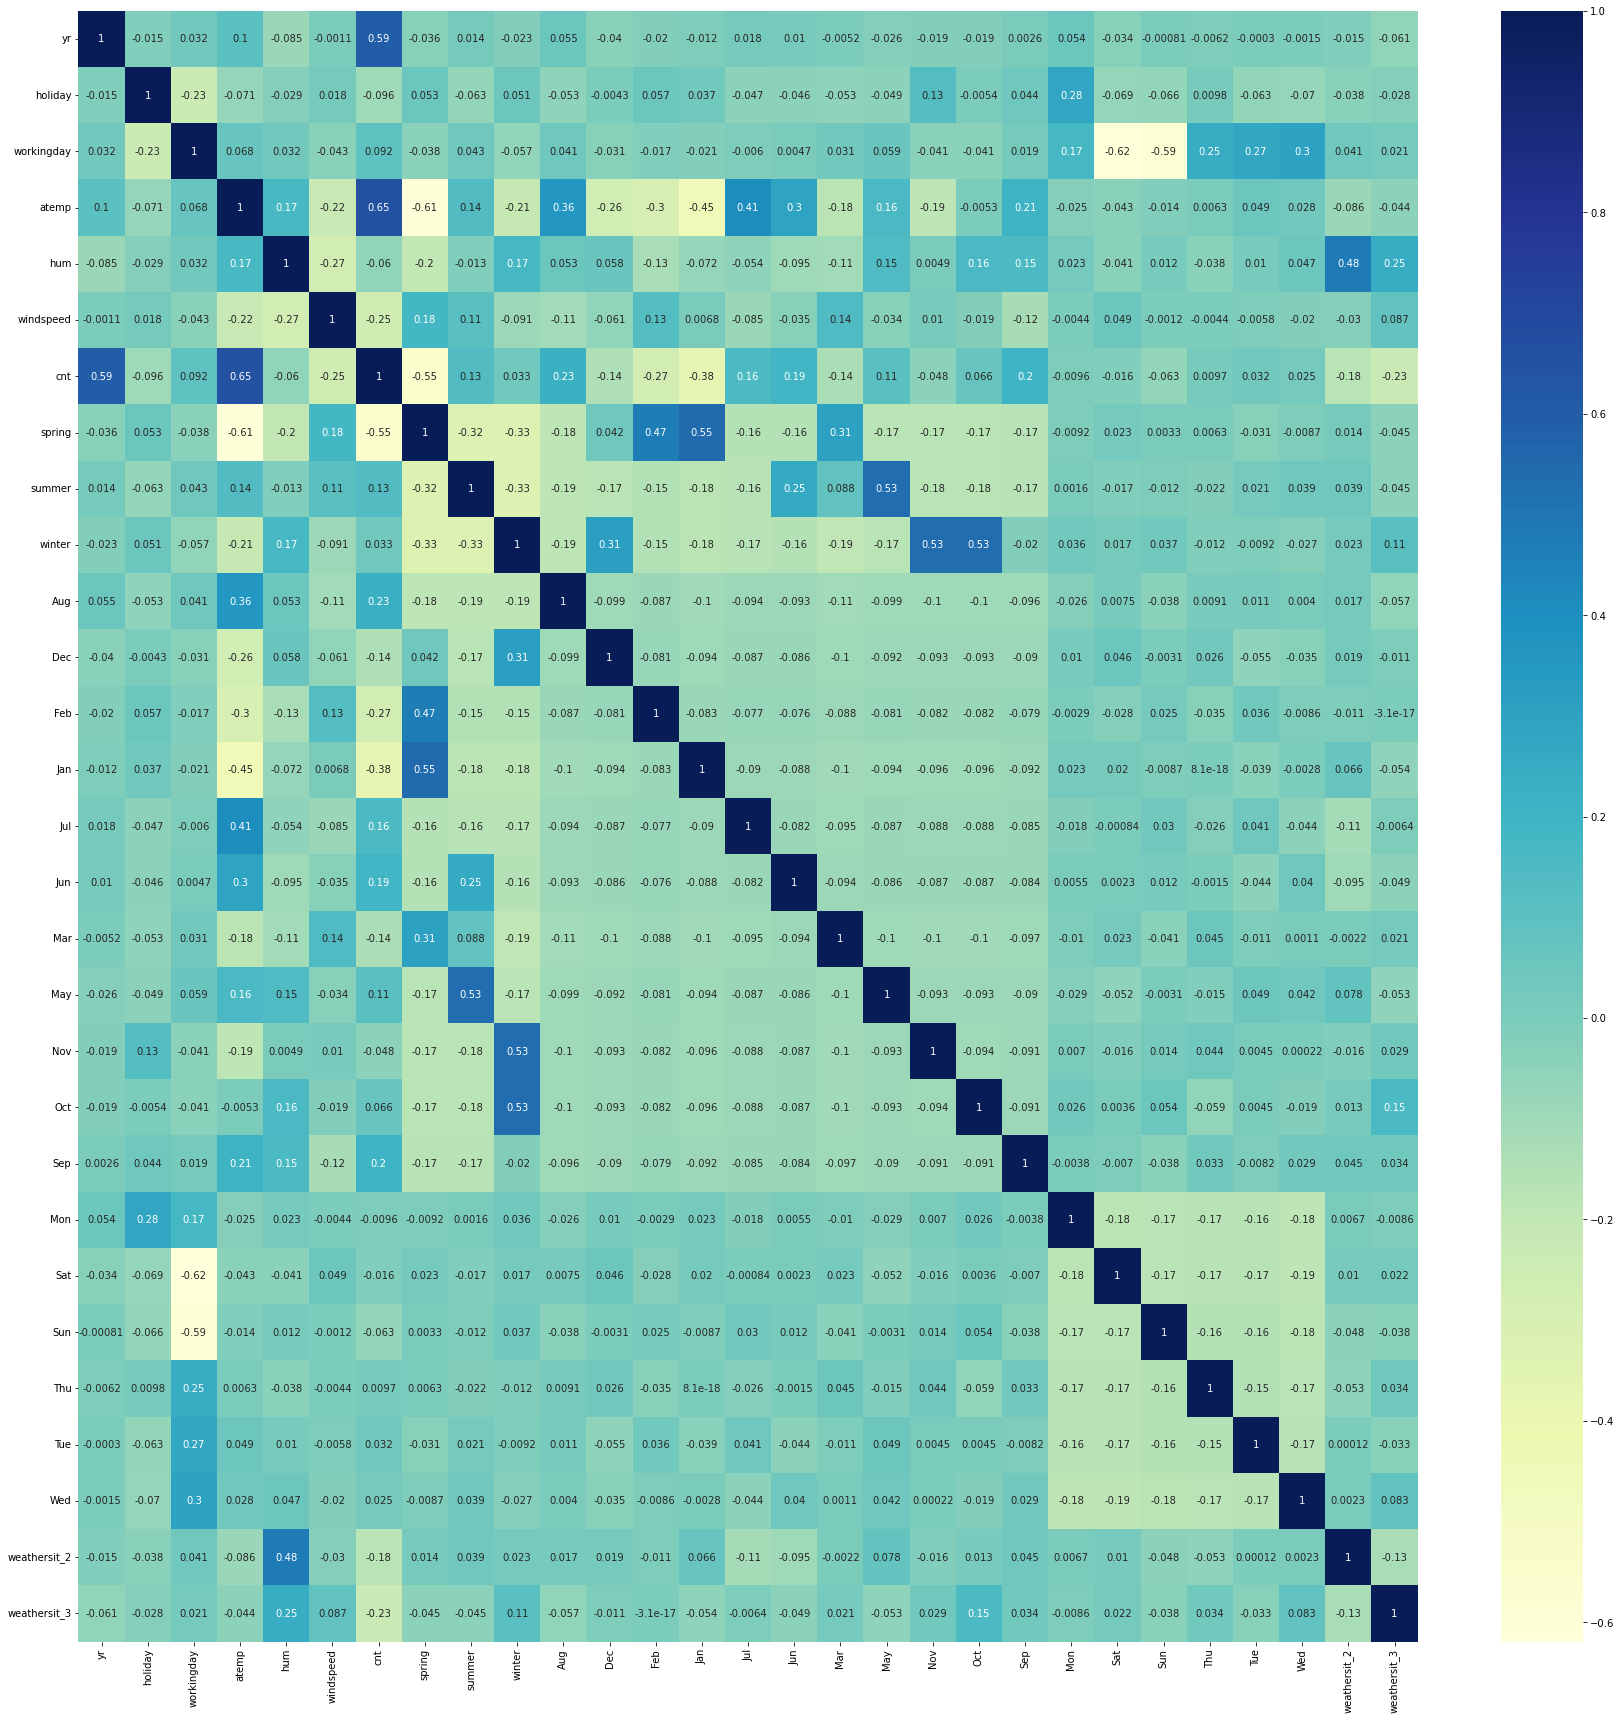

In [49]:
plt.figure(figsize = (30, 30))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### From above heatmap, primary observation says, more or less below variables show positive and negative correlation with target variable i.e. 'cnt'

Positive Correlation: sep (0.2), May (0.11), Jun (0.19), Jul (0.16), Aug (0.23), summer (0.13), atemp (0.65),yr (0.59)

Negative Correlation: weathersit_2 (-0.18), weathersit_3 (-0.23), Mar (-0.14), Jan (-0.38), Feb (-0.27), Dec (-0.14), spring (-0.55), windspeed (-0.25)

### Dividing into X and Y sets for the model building

In [50]:
y_train = df_train.pop('cnt')
X_train = df_train

### Building a linear model

In [51]:
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const           0.261656
yr              0.234176
holiday         0.021320
workingday      0.101138
atemp           0.419497
hum            -0.145605
windspeed      -0.168583
spring         -0.055055
summer          0.030819
winter          0.099787
Aug             0.036894
Dec            -0.054028
Feb            -0.040490
Jan            -0.073420
Jul            -0.020120
Jun             0.017822
Mar            -0.000636
May             0.035849
Nov            -0.047654
Oct             0.007796
Sep             0.091471
Mon            -0.026325
Sat             0.096947
Sun             0.042251
Thu            -0.013201
Tue            -0.022156
Wed            -0.008112
weathersit_2   -0.062605
weathersit_3   -0.254551
dtype: float64

In [52]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     101.9
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          4.12e-180
Time:                        23:08:24   Log-Likelihood:                 523.84
No. Observations:                 510   AIC:                            -991.7
Df Residuals:                     482   BIC:                            -873.1
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2617      0.035      7.468   

In [53]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,83.25
21,Sat,19.34
22,Sun,18.01
6,spring,10.74
8,winter,9.47
7,summer,8.23
17,Nov,6.77
18,Oct,6.59
9,Aug,6.24
3,atemp,5.95


In [54]:
# Looking at very high VIF of workingday, it tempts to drop this variable, when I look at p-value of workingday it is zero
# so it looks significant at the moment. Also its co-efficient is higher than some of very low co-efficients' variables.

# When I check p-value of other variables, I found very high p-value for Mar with very very low co-efficient value
# so decided to drop it first

X = X_train.drop('Mar', 1,)
X_train_lm = sm.add_constant(X)
lr_2 = sm.OLS(y_train, X_train_lm).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     106.0
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          3.96e-181
Time:                        23:08:24   Log-Likelihood:                 523.84
No. Observations:                 510   AIC:                            -993.7
Df Residuals:                     483   BIC:                            -879.4
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2613      0.033      7.969   

In [55]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,72.85
20,Sat,16.89
21,Sun,15.90
6,spring,9.62
8,winter,9.14
7,summer,7.93
3,atemp,5.79
9,Aug,5.48
13,Jul,4.94
16,Nov,4.86


In [56]:
# With the similar logic explained above, I am dropping Oct variable

X = X.drop('Oct', 1,)
X_train_lm = sm.add_constant(X)
lr_3 = sm.OLS(y_train, X_train_lm).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     110.5
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          3.86e-182
Time:                        23:08:24   Log-Likelihood:                 523.80
No. Observations:                 510   AIC:                            -995.6
Df Residuals:                     484   BIC:                            -885.5
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2632      0.032      8.216   

In [57]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,70.07
19,Sat,16.25
20,Sun,15.26
6,spring,9.20
8,winter,7.15
7,summer,6.75
3,atemp,5.77
9,Aug,4.63
13,Jul,4.24
1,holiday,3.83


In [58]:
# Same logic for removing Wed as well. I am observing F-statistic value as well, which is increasing with every removal
# so looks like I am on the right path

X = X.drop('Wed', 1,)
X_train_lm = sm.add_constant(X)
lr_4 = sm.OLS(y_train, X_train_lm).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     115.2
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          4.12e-183
Time:                        23:08:24   Log-Likelihood:                 523.65
No. Observations:                 510   AIC:                            -997.3
Df Residuals:                     485   BIC:                            -891.4
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2624      0.032      8.206   

In [59]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,68.36
19,Sat,16.20
20,Sun,15.22
6,spring,9.19
8,winter,7.15
7,summer,6.74
3,atemp,5.76
9,Aug,4.63
13,Jul,4.24
1,holiday,3.78


In [60]:
X = X.drop('Thu', 1,)
X_train_lm = sm.add_constant(X)
lr_5 = sm.OLS(y_train, X_train_lm).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     120.4
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          4.61e-184
Time:                        23:08:25   Log-Likelihood:                 523.42
No. Observations:                 510   AIC:                            -998.8
Df Residuals:                     486   BIC:                            -897.2
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2609      0.032      8.184   

In [61]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,67.43
19,Sat,16.20
20,Sun,15.22
6,spring,9.19
8,winter,7.14
7,summer,6.74
3,atemp,5.76
9,Aug,4.63
13,Jul,4.23
1,holiday,3.73


In [62]:
X = X.drop('Jul', 1,)
X_train_lm = sm.add_constant(X)
lr_6 = sm.OLS(y_train, X_train_lm).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     125.9
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          5.27e-185
Time:                        23:08:25   Log-Likelihood:                 523.14
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     487   BIC:                            -902.9
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2541      0.030      8.345   

In [63]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,61.36
18,Sat,14.63
19,Sun,13.83
6,spring,6.05
3,atemp,4.87
8,winter,4.11
7,summer,4.04
1,holiday,3.55
12,Jan,2.39
4,hum,2.00


In [64]:
X = X.drop('holiday', 1,)
X_train_lm = sm.add_constant(X)
lr_7 = sm.OLS(y_train, X_train_lm).fit()
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     125.9
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          5.27e-185
Time:                        23:08:25   Log-Likelihood:                 523.14
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     487   BIC:                            -902.9
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2712      0.046      5.845   

In [65]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,36.54
2,atemp,23.33
1,workingday,20.02
5,spring,6.40
17,Sat,5.57
18,Sun,5.29
4,windspeed,5.05
7,winter,4.75
6,summer,4.33
11,Jan,2.44


In [66]:
X = X.drop('Sun', 1,)
X_train_lm = sm.add_constant(X)
lr_8 = sm.OLS(y_train, X_train_lm).fit()
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     131.9
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          6.89e-186
Time:                        23:08:25   Log-Likelihood:                 522.70
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     488   BIC:                            -908.2
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2950      0.039      7.656   

In [67]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,33.29
2,atemp,20.03
5,spring,5.90
1,workingday,5.16
4,windspeed,4.80
7,winter,4.42
6,summer,3.98
11,Jan,2.40
19,weathersit_2,2.32
0,yr,2.12


In [68]:
X = X.drop('spring', 1,)
X_train_lm = sm.add_constant(X)
lr_9 = sm.OLS(y_train, X_train_lm).fit()
print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     137.4
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          4.63e-186
Time:                        23:08:25   Log-Likelihood:                 520.51
No. Observations:                 510   AIC:                            -999.0
Df Residuals:                     489   BIC:                            -910.1
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2546      0.033      7.664   

In [69]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,26.60
2,atemp,17.60
1,workingday,5.02
4,windspeed,4.16
6,winter,3.06
5,summer,3.00
18,weathersit_2,2.24
0,yr,2.09
10,Jan,1.99
16,Sat,1.85


In [70]:
X = X.drop('May', 1,)
X_train_lm = sm.add_constant(X)
lr_10 = sm.OLS(y_train, X_train_lm).fit()
print(lr_10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     143.7
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          2.39e-186
Time:                        23:08:25   Log-Likelihood:                 518.58
No. Observations:                 510   AIC:                            -997.2
Df Residuals:                     490   BIC:                            -912.5
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2433      0.033      7.421   

In [71]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,26.60
2,atemp,17.10
1,workingday,5.01
4,windspeed,4.05
6,winter,3.06
5,summer,2.35
17,weathersit_2,2.24
0,yr,2.08
10,Jan,1.99
15,Sat,1.85


In [72]:
X = X.drop('Jun', 1,)
X_train_lm = sm.add_constant(X)
lr_11 = sm.OLS(y_train, X_train_lm).fit()
print(lr_11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     151.7
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          2.61e-187
Time:                        23:08:26   Log-Likelihood:                 518.26
No. Observations:                 510   AIC:                            -998.5
Df Residuals:                     491   BIC:                            -918.1
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2424      0.033      7.400   

In [73]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,25.75
2,atemp,14.98
1,workingday,5.01
4,windspeed,4.04
6,winter,3.05
5,summer,2.30
16,weathersit_2,2.23
0,yr,2.07
10,Jan,1.97
14,Sat,1.85


In [74]:
X = X.drop('Tue', 1,)
X_train_lm = sm.add_constant(X)
lr_12 = sm.OLS(y_train, X_train_lm).fit()
print(lr_12.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     160.3
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          4.77e-188
Time:                        23:08:26   Log-Likelihood:                 517.36
No. Observations:                 510   AIC:                            -998.7
Df Residuals:                     492   BIC:                            -922.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2437      0.033      7.438   

In [75]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,25.75
2,atemp,14.97
1,workingday,4.71
4,windspeed,4.04
6,winter,3.05
5,summer,2.30
15,weathersit_2,2.23
0,yr,2.07
10,Jan,1.97
14,Sat,1.84


In [76]:
X = X.drop('Mon', 1,)
X_train_lm = sm.add_constant(X)
lr_13 = sm.OLS(y_train, X_train_lm).fit()
print(lr_13.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     169.4
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.69e-188
Time:                        23:08:26   Log-Likelihood:                 515.75
No. Observations:                 510   AIC:                            -997.5
Df Residuals:                     493   BIC:                            -925.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2429      0.033      7.399   

In [77]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,25.70
2,atemp,14.97
1,workingday,4.67
4,windspeed,4.03
6,winter,3.04
5,summer,2.30
14,weathersit_2,2.23
0,yr,2.07
10,Jan,1.97
11,Nov,1.83


In [78]:
X = X.drop('Feb', 1,)
X_train_lm = sm.add_constant(X)
lr_14 = sm.OLS(y_train, X_train_lm).fit()
print(lr_14.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     178.5
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          2.32e-188
Time:                        23:08:26   Log-Likelihood:                 512.71
No. Observations:                 510   AIC:                            -993.4
Df Residuals:                     494   BIC:                            -925.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2116      0.030      6.971   

In [79]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,21.43
2,atemp,12.73
1,workingday,4.62
4,windspeed,3.80
6,winter,2.81
13,weathersit_2,2.18
0,yr,2.05
5,summer,2.00
12,Sat,1.82
10,Nov,1.80


In [80]:
X = X.drop('Nov', 1,)
X_train_lm = sm.add_constant(X)
lr_15 = sm.OLS(y_train, X_train_lm).fit()
print(lr_15.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.5
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.70e-188
Time:                        23:08:26   Log-Likelihood:                 510.29
No. Observations:                 510   AIC:                            -990.6
Df Residuals:                     495   BIC:                            -927.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2025      0.030      6.711   

In [81]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,21.15
2,atemp,12.48
1,workingday,4.62
4,windspeed,3.77
12,weathersit_2,2.17
6,winter,2.07
0,yr,2.05
5,summer,1.99
11,Sat,1.82
9,Jan,1.63


In [82]:
X = X.drop('Dec', 1,)
X_train_lm = sm.add_constant(X)
lr_16 = sm.OLS(y_train, X_train_lm).fit()
print(lr_16.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.3
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          4.22e-189
Time:                        23:08:26   Log-Likelihood:                 508.96
No. Observations:                 510   AIC:                            -989.9
Df Residuals:                     496   BIC:                            -930.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1963      0.030      6.549   

In [83]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,19.72
2,atemp,11.71
1,workingday,4.59
4,windspeed,3.77
11,weathersit_2,2.15
0,yr,2.04
6,winter,2.03
5,summer,1.96
10,Sat,1.81
7,Aug,1.56


In [84]:
X = X.drop('Jan', 1,)
X_train_lm = sm.add_constant(X)
lr_17 = sm.OLS(y_train, X_train_lm).fit()
print(lr_17.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.7
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          4.60e-189
Time:                        23:08:26   Log-Likelihood:                 506.07
No. Observations:                 510   AIC:                            -986.1
Df Residuals:                     497   BIC:                            -931.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1762      0.029      6.099   

In [85]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,16.38
2,atemp,9.83
1,workingday,4.53
4,windspeed,3.76
10,weathersit_2,2.12
0,yr,2.02
5,summer,1.83
9,Sat,1.79
6,winter,1.74
7,Aug,1.55


In [86]:
# Now I have all the significant variables remaining in the model considering their p-values. 
# But hum and atemp have very high VIF. From their co-efficients atemp has higher co-eff than hum hence dropping hum now

X = X.drop('hum', 1,)
X_train_lm = sm.add_constant(X)
lr_18 = sm.OLS(y_train, X_train_lm).fit()
print(lr_18.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     227.2
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          4.54e-186
Time:                        23:08:27   Log-Likelihood:                 496.15
No. Observations:                 510   AIC:                            -968.3
Df Residuals:                     498   BIC:                            -917.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0782      0.019      4.117   

In [87]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,6.02
1,workingday,4.06
3,windspeed,3.45
0,yr,2.02
4,summer,1.82
8,Sat,1.69
6,Aug,1.55
9,weathersit_2,1.54
5,winter,1.52
7,Sep,1.30


In [88]:
# I need to remove one more variable so that I can finall have a model with 10 variables.
# Since all the variables have 0 p-value, we will have to take a look at VIF. And while looking at VIF values,
# it initially tempts to remove atemp as it has the highest VIF. But from the heatmap, we had observed high correlation
# atemp, also in summary statistics we see highest co-efficient is associated with atemp so we cannot simply remove it.
# so next candidate is workingday, which has comparitavely higher VIF, lowest co-efficient value associated with it.
# Hence dropping workingday variable next
X = X.drop('workingday', 1,)
X_train_lm = sm.add_constant(X)
lr_19 = sm.OLS(y_train, X_train_lm).fit()
print(lr_19.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     236.8
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          2.73e-182
Time:                        23:08:27   Log-Likelihood:                 484.37
No. Observations:                 510   AIC:                            -946.7
Df Residuals:                     499   BIC:                            -900.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1197      0.017      6.899   

In [89]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,atemp,4.93
2,windspeed,3.09
0,yr,2.00
3,summer,1.82
5,Aug,1.55
4,winter,1.50
8,weathersit_2,1.49
6,Sep,1.30
7,Sat,1.18
9,weathersit_3,1.08


This looks like a good model to me. All VIFs are lower than 5, all p-values are 0 and all co-efficients are measurable i.e. not very low. So let us consider this as our final model.

### Residual Analysis of the train data

In [90]:
y_train_cnt = lr_19.predict(X_train_lm)
y_train_cnt.shape

(510,)

Text(0, 0.5, 'y_pred_train')

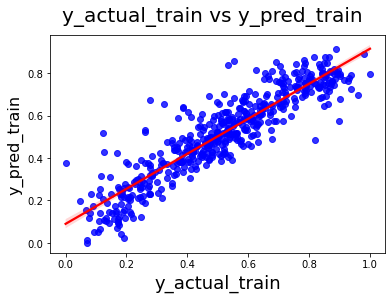

In [91]:
fig = plt.figure()
sns.regplot(y_train, y_train_cnt, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
fig.suptitle('y_actual_train vs y_pred_train', fontsize = 20)              # Plot heading 
plt.xlabel('y_actual_train', fontsize = 18)                          # X-label
plt.ylabel('y_pred_train', fontsize = 16) 

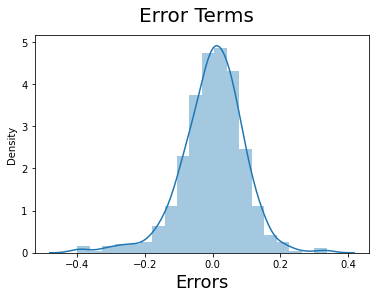

In [94]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

# We observe that error terms are normally distributed with mean as 0

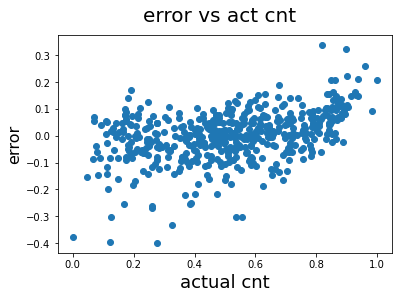

In [95]:
fig1 = plt.figure()
plt.scatter(y_train, (y_train - y_train_cnt))
fig1.suptitle('error vs act cnt', fontsize = 20)              # Plot heading 
plt.xlabel('actual cnt', fontsize = 18)                          # X-label
plt.ylabel('error', fontsize = 16) 
plt.show()

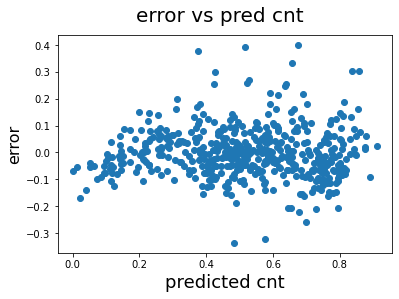

In [96]:
fig1 = plt.figure()
plt.scatter(y_train_cnt, (y_train_cnt - y_train))
fig1.suptitle('error vs pred cnt', fontsize = 20)              # Plot heading 
plt.xlabel('predicted cnt', fontsize = 18)                          # X-label
plt.ylabel('error', fontsize = 16)
plt.show()

# Error terms show constant variance and the error terms are independent of each other

### Making Predictions Using the Final Model

In [97]:
num_vars = ['atemp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [98]:
df_test.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,weathersit_2,weathersit_3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.319635,0.027397
std,0.500722,0.188034,0.459904,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [99]:
y_test = df_test.pop('cnt')
X_test = df_test

In [100]:
X.columns

Index(['yr', 'atemp', 'windspeed', 'summer', 'winter', 'Aug', 'Sep', 'Sat',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [101]:
X_test.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar',
       'May', 'Nov', 'Oct', 'Sep', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [102]:
X_test = X_test.drop(['holiday', 'hum', 'spring', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Mon', 'workingday', 'Sun', 'Thu', 'Tue', 'Wed'], axis=1)

In [103]:
X_test.columns

Index(['yr', 'atemp', 'windspeed', 'summer', 'winter', 'Aug', 'Sep', 'Sat',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [104]:
X_test_m = sm.add_constant(X_test)

In [105]:
X_test_m.columns

Index(['const', 'yr', 'atemp', 'windspeed', 'summer', 'winter', 'Aug', 'Sep',
       'Sat', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [106]:
X.columns

Index(['yr', 'atemp', 'windspeed', 'summer', 'winter', 'Aug', 'Sep', 'Sat',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [107]:
y_pred = lr_19.predict(X_test_m)

In [108]:
r2_score(y_true=y_test, y_pred=y_pred)

0.7935094003214338

In [109]:
# % difference in adjusted R-squared

(0.822-0.794)/0.822*100

3.40632603406325

### Model Evaluation

Text(0, 0.5, 'y_pred')

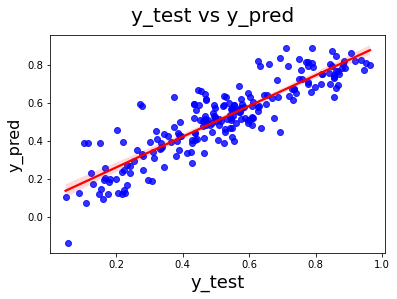

In [110]:
fig = plt.figure()
sns.regplot(y_test, y_pred, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 

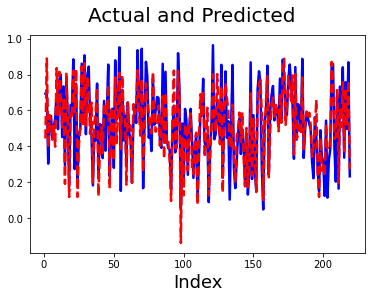

In [111]:
c = [i for i in range(1,220,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red", linewidth=2.5, linestyle="--")
fig.suptitle('Actual and Predicted', fontsize=20)
plt.xlabel('Index', fontsize=18)
plt.show()

##### We can see that the equation of our best fitted line is:

cnt = 0.1197 + 0.2341 × yr + 0.5426 × atemp - 0.1356 × windspeed + 0.0994 × summer + 0.1312 × winter + 0.0686 × Aug + 0.1176 × Sep + 0.0213 × Sat - 0.0822 × weathersit_2 - 0.2735 × weathersit_3